In [56]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from datetime import datetime
now = datetime.now()

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading pre-processed Dataset**

We have pre-processed the dataset as part of EDA during the last assignment

In [57]:
customer_data = pd.read_csv("marketing_campaign_eng.csv", index_col='ID', infer_datetime_format=True)

In [58]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3873.586824,1,0,0,2252
2174,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3027.586824,1,2,0,38
4141,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3374.586824,2,0,0,1202
6182,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2967.586824,2,1,0,64
5324,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3223.586824,2,1,0,595


In [59]:
customer_data.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [60]:
# Changing object data type to categorical
customer_data['Education'] = pd.Categorical(customer_data.Education)

In [61]:
#Education column has 5 unique values
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [62]:
#Converting all categorical to numeric using cat codes
cat_columns = customer_data.select_dtypes(['category']).columns
customer_data[cat_columns] = customer_data[cat_columns].apply(lambda x: x.cat.codes)

In [63]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3873.586824,1,0,0,2252
2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3027.586824,1,2,0,38
4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3374.586824,2,0,0,1202
6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2967.586824,2,1,0,64
5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3223.586824,2,1,0,595


In [64]:
customer_data.dtypes

Education                 int8
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [65]:
print("['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]\n")
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]

[2 4 3 1 0]
2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64


# **Dimensionality Reduction**


## Imports

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.graph_objects as go

## Scaling

In [67]:
dataC = customer_data.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= customer_data.columns)
print("Dataset after scaling:")
scaled_data.head()

Dataset after scaling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
0,-0.350141,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.097282,2.388846,0.985345,1.976745,-1.346874,-1.264505,-0.439037,1.466973
1,-0.350141,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.418612,1.235733,-1.667011,-1.346874,1.396361,-0.439037,-0.952725
2,-0.350141,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.097282,-0.418612,0.317643,-0.172468,0.742460,-1.264505,-0.439037,0.319420
3,-0.350141,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.418612,-1.268149,-1.925433,0.742460,0.065928,-0.439037,-0.924309
4,1.428354,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.418612,-1.017761,-0.822831,0.742460,0.065928,-0.439037,-0.343975


## Agglomerative Clustering

In [68]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


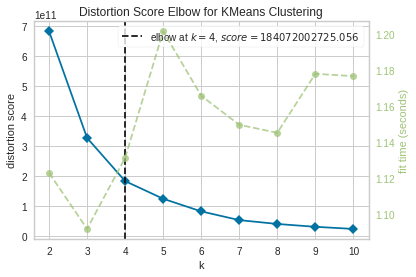

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_KM = KElbowVisualizer(KMeans(), k=10)
Elbow_KM.fit(customer_data)
Elbow_KM.show()

Insights from the above Elbow Method:

We will use k = 4, thus there will be four clusters in our dataset.
We will use Agglomerative Clustering Algorithm for clustering.

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
cluster_AC = AC.fit_predict(customer_data)
customer_data["Clusters"] = cluster_AC

In [72]:
color_palette = ["#EB4949","#C36CF6", "#039B45","#085EC1"]

Let us now look at the distribution of customers within the clusters

In [73]:
#!pip install matplotlib --upgrade

In [74]:
# checking matplotlib version as bar_label feature is available in matplotlib 3.4 or higher
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


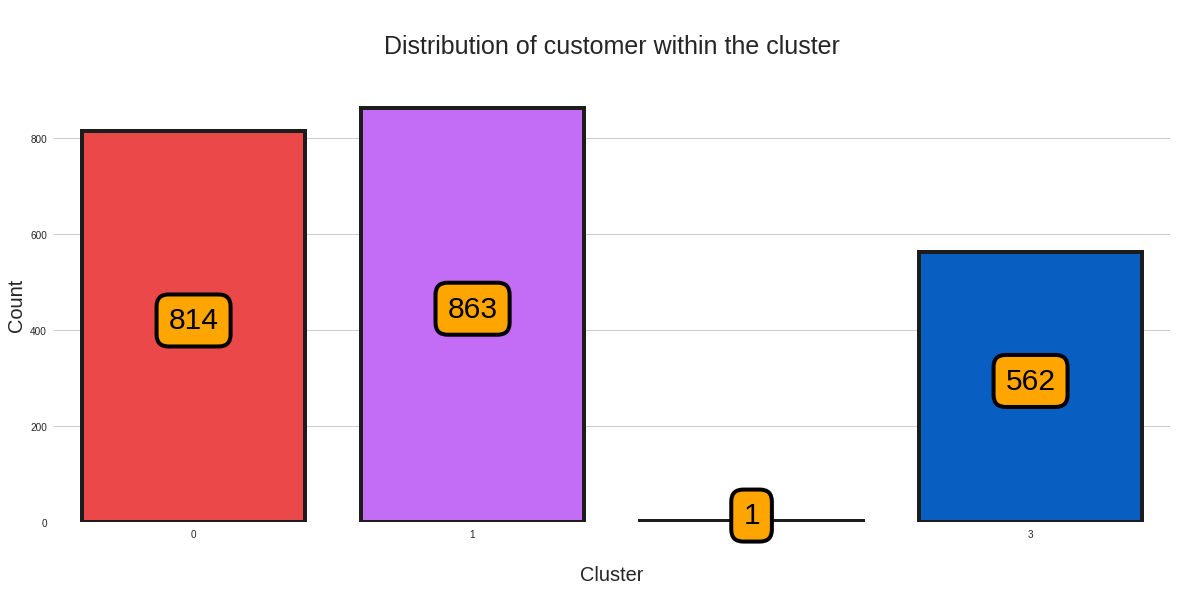

In [75]:
plt.subplots(figsize = (20, 8))
p = sns.countplot(x = customer_data["Clusters"], palette = color_palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nDistribution of customer within the cluster\n", fontsize = 25)
p.axes.set_ylabel("Count", fontsize = 20)
p.axes.set_xlabel("\nCluster", fontsize = 20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6, size = 30, color = "black", rotation=0, bbox={"boxstyle" : "round", "pad" : 0.4, "facecolor" : "orange", "edgecolor" : "black", "linewidth" : 4, "alpha" : 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights from the cluster distribution:**

* Cluster 1: 814 Customers
* Cluster 2: 863 Customers
* Cluster 3: 1 Customer
* Cluster 4: 562 Customers


1. By chooosing number of centroids as 4 for the cluster analysis, we seemed to have identified a certain customer which is an outlier. We will investigate what causes this customer to be an outlier further down the notebook.

2. The rest of the cluster seem to have an almost uniform distribution, we will analyse what makes these cluster differernt from each other.

## **Cluster Analysis**
Understanding what makes the clusters differernt from each other.


### Income - Item Expenditure Based Clustering Profile:

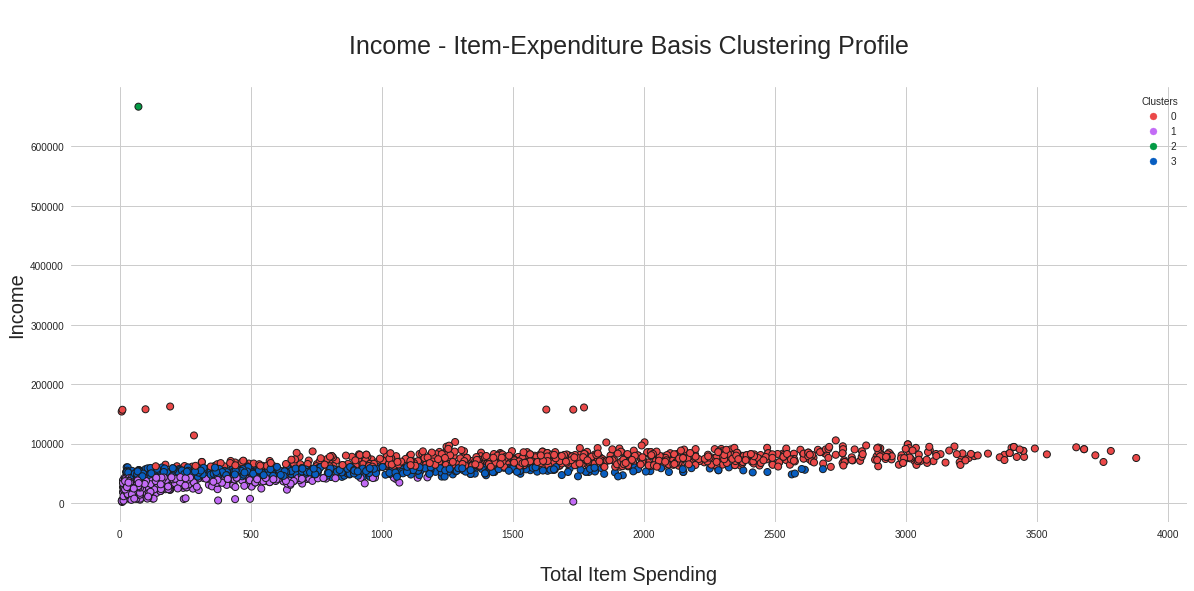

In [76]:
_, axes = plt.subplots(figsize=(20,8))

sns.scatterplot(x = customer_data["Itm_Total"], y = customer_data["Income"], hue = customer_data["Clusters"], palette = color_palette, sizes = 60, alpha=1, edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome - Item-Expenditure Basis Clustering Profile\n", fontsize=25)
axes.set_ylabel("Income", fontsize=20)
axes.set_xlabel("\nTotal Item Spending", fontsize=20)

sns.despine(left = True, bottom = True)
plt.show()

**Inight from the above distribution**

1. We can see within cluster 2, the customer seems to have very high income causing the customer to become an OUTLIER within the customer base.

**Treatment**

We will now go ahead and remove the customer with that highest income and redo Kmeans after outlier treatment.



In [77]:
#Seeing the Income column data distribution. Note: max is very high the mean and standard deviation
customer_data.Income.describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [78]:
#Getting Id of the customer in cluster 2
outlier_id = customer_data.index[customer_data['Clusters'] == 2].tolist()[0]

In [79]:
#dropping the customer
customer_data_treatment = customer_data.drop(outlier_id)

In [80]:
#Now the max is comparable to the mean and standard deviation
customer_data_treatment.Income.describe()

count      2239.000000
mean      51972.834762
std       21410.605416
min        1730.000000
25%       35533.500000
50%       51717.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

In [81]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
cluster_AC = AC.fit_predict(customer_data_treatment)
customer_data_treatment["Clusters"] = cluster_AC

In [82]:
color_palette = ["#EB4949","#C36CF6", "#039B45","#085EC1"]

In [83]:
# checking matplotlib version as bar_label feature is available in matplotlib 3.4 or higher
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


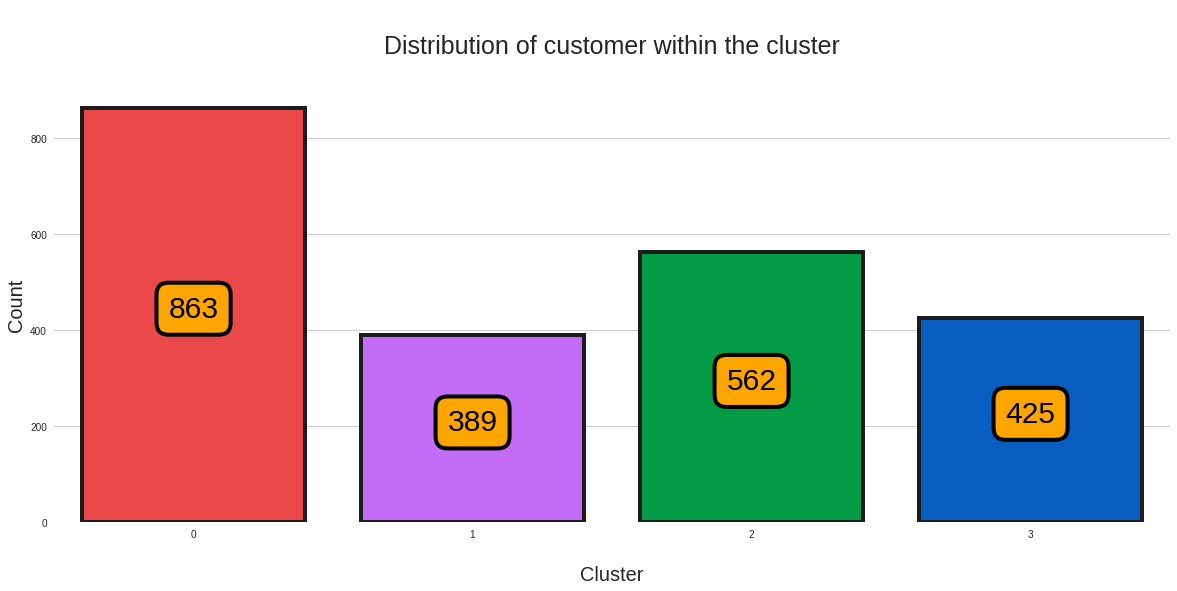

In [84]:
plt.subplots(figsize = (20, 8))
p = sns.countplot(x = customer_data_treatment["Clusters"], palette = color_palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nDistribution of customer within the cluster\n", fontsize = 25)
p.axes.set_ylabel("Count", fontsize = 20)
p.axes.set_xlabel("\nCluster", fontsize = 20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6, size = 30, color = "black", rotation=0, bbox={"boxstyle" : "round", "pad" : 0.4, "facecolor" : "orange", "edgecolor" : "black", "linewidth" : 4, "alpha" : 1})

sns.despine(left = True, bottom = True)
plt.show()

Insights from the cluster distribution:

Cluster 1: 863 Customers
Cluster 2: 389 Customers
Cluster 3: 562 Customers
Cluster 4: 425 Customers
Post the outlier treament, all the clusters now seem to have an almost uniform distribution, we will analyse what makes these cluster differernt from each other.

### Total Item Spending based Clustering Profile:

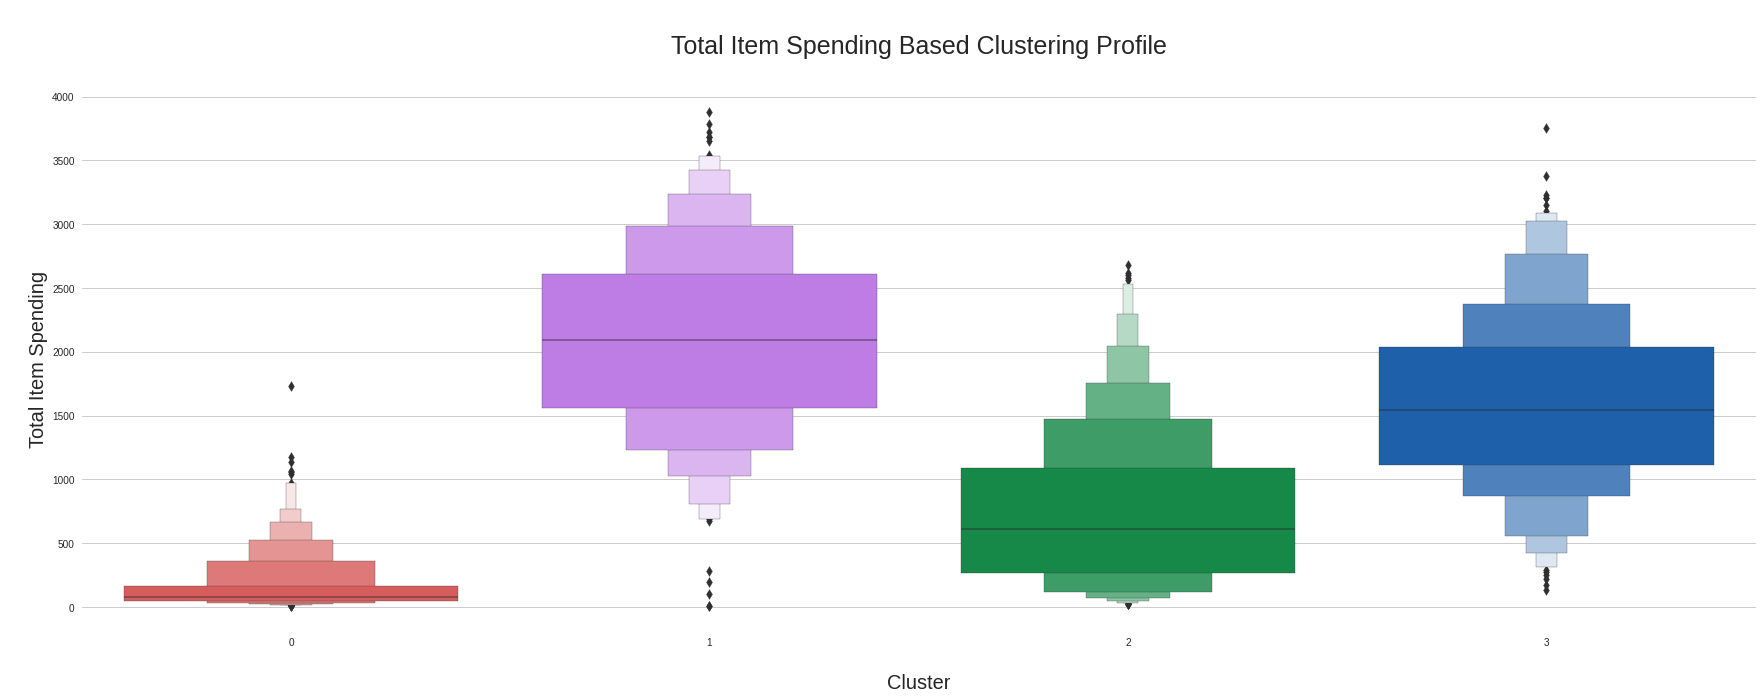

In [85]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data_treatment["Clusters"], y = customer_data_treatment["Itm_Total"], palette = color_palette)

axes.set_title("\nTotal Item Spending Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nTotal Item Spending", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers spending range is in between 0 to 1100.
* Most of the cluster 1 customers spending range is in between 800 to 3200.
* Most of the cluster 2 customers spending range is in between 0 to 2600.
* Most of the cluster 3 customers spending range is in between 100 to 3100.

### Income based Clustering Profile

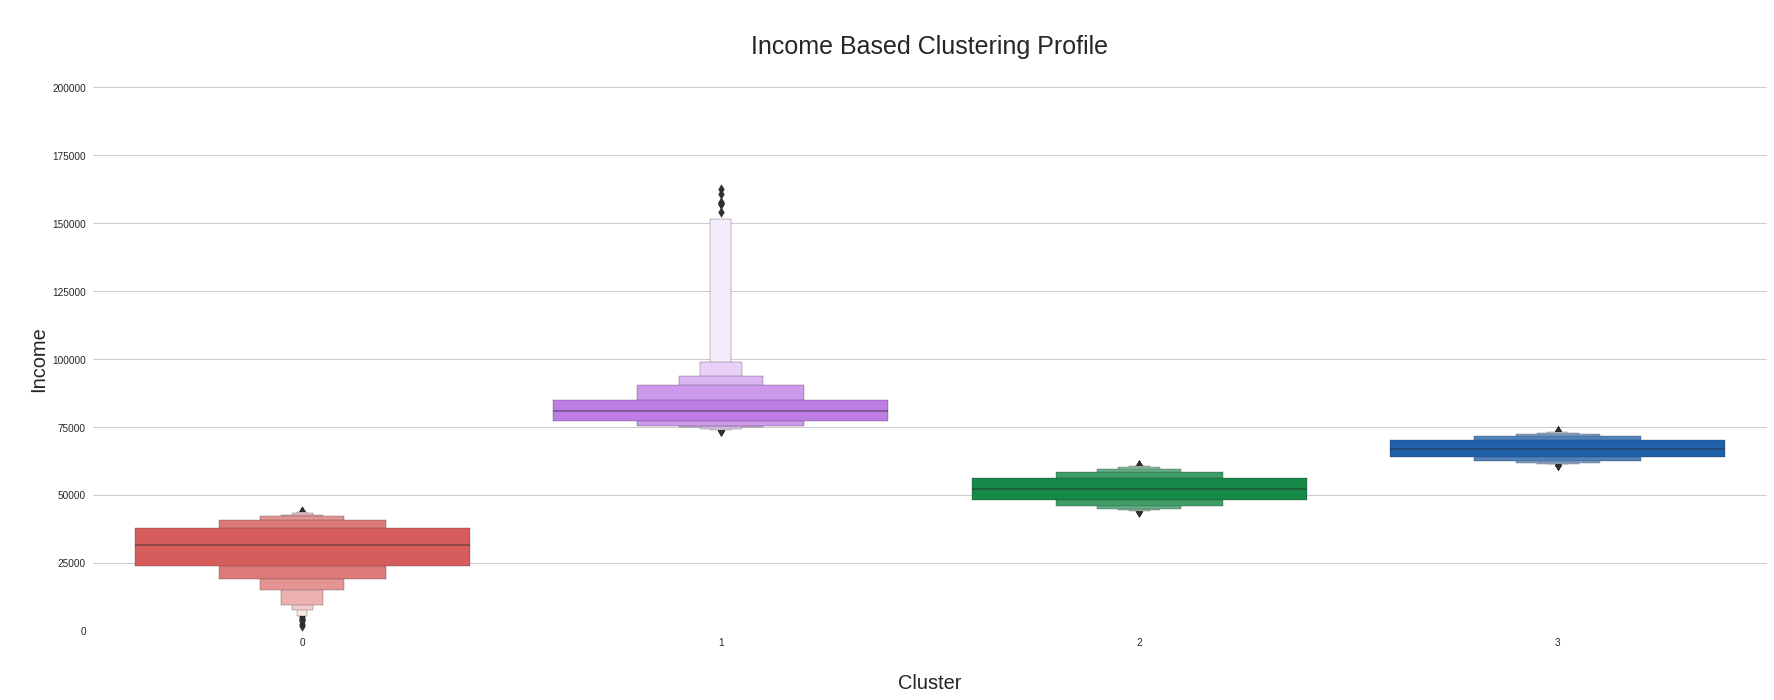

In [86]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data_treatment["Clusters"], y = customer_data_treatment["Income"], palette = color_palette)

axes.set_ylim([0, 200000])

axes.set_title("\nIncome Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nIncome", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers income range is in between 0 to 45000.
* Most of the cluster 1 customers spending range is in between 75000 to 155000.
* Most of the cluster 2 customers spending range is in between 40000 to 60000.
* Most of the cluster 3 customers spending range is in between 60000 to 75000.

#### Cluster profiling based on Total Item Spending v/s **X**
**X** = childern, age, education level, marital status, number of kids, days since joining.

In [87]:
def density_cluster(parameter):
    _, axes = plt.subplots(figsize = (30, 12))
    sns.kdeplot(x = customer_data_treatment[parameter], y = customer_data_treatment["Itm_Total"], hue = customer_data_treatment["Clusters"], kind="kde", height = 10, palette = color_palette)
    axes.set_title(f"\nClustering Profile On {parameter}\n", fontsize = 25)
    axes.set_ylabel("Spending", fontsize = 20)
    axes.set_xlabel(f"\n{parameter}", fontsize = 20)
    
    sns.despine(left = True, bottom = True)
    plt.show()

##### Total Item Spending v/s Children

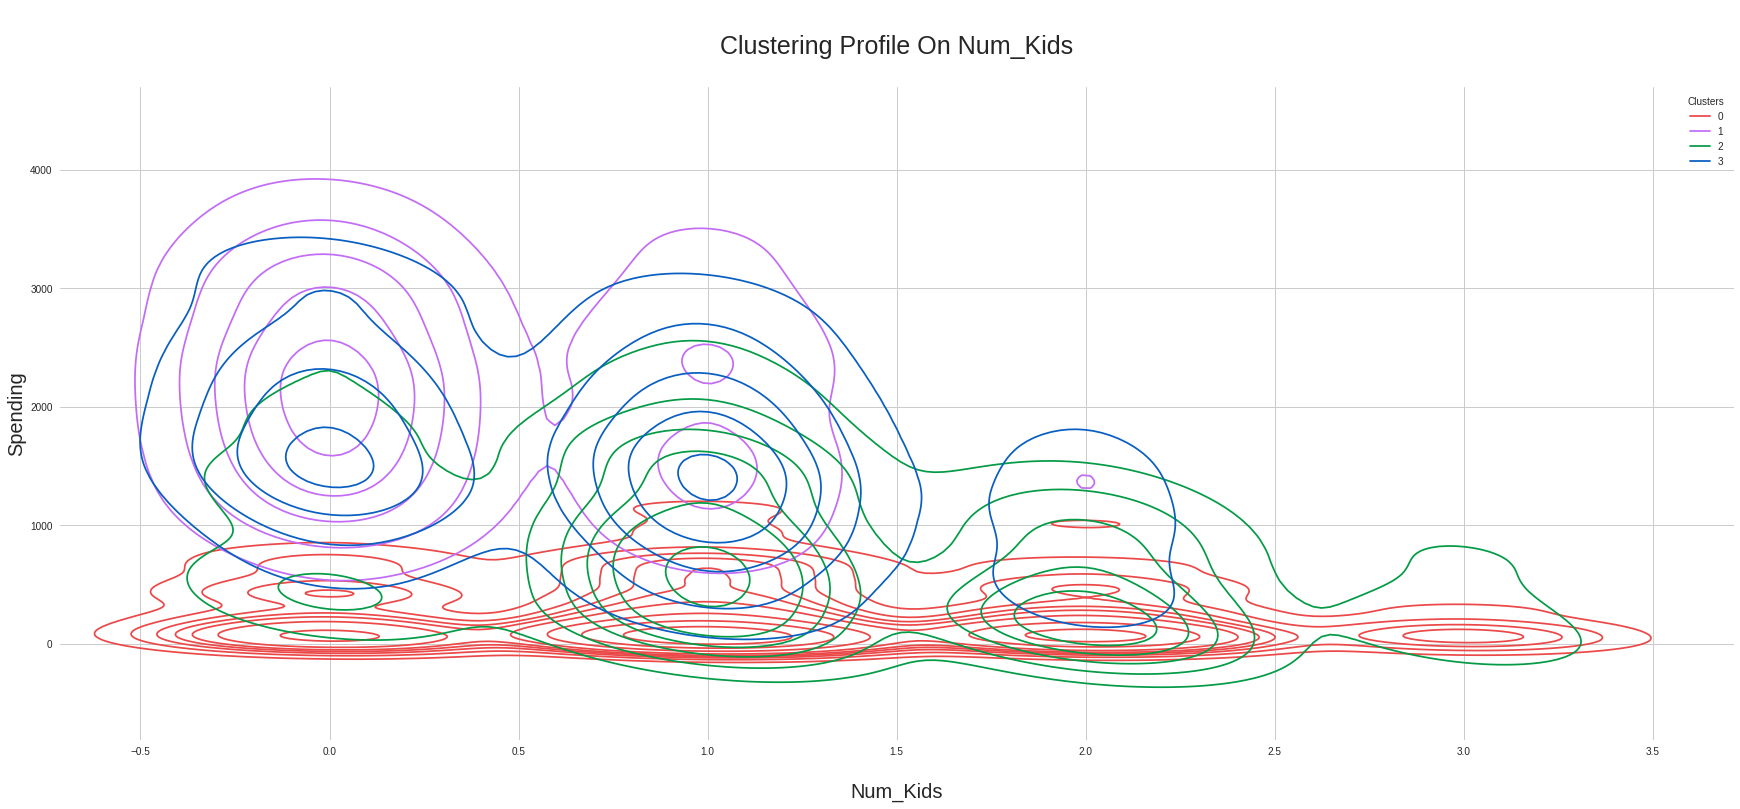

In [88]:
#cluster comparison of total item spending with total number of kids in the household
density_cluster("Num_Kids")

**Insights:**

* Most of the Customers of cluster 0 have at most one child, some have two and very few have three. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 don't have any child, only a few have one. Their spending range is in between 500 to 4000.
* Most of the customers of cluster 2 have one child, some have two. Their spending range is in between 0 to 2500.
* Most of the customers of cluster 3 have 0 child, some have one and very few have 2. Their spending range is in between 500 to 3500.

##### Total Item Spending v/s Education Level

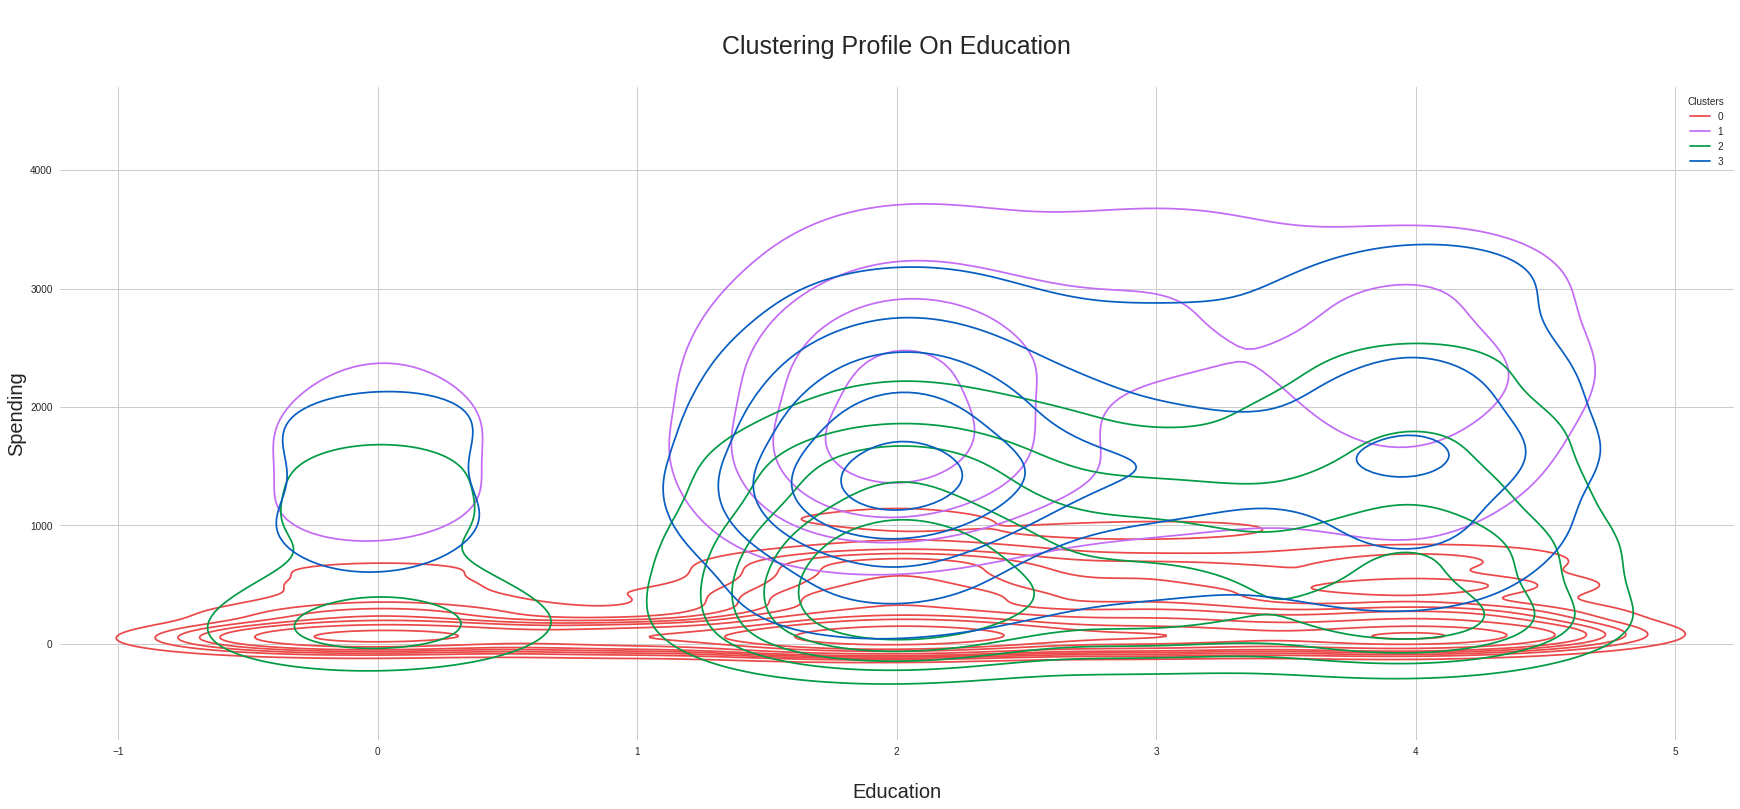

In [89]:
#cluster comparison of total item spending with the education level
density_cluster("Education")

**Insights:**

* Graduate: 2 : Graduate
* Phd: 4 : Postgraduate
* Master: 3 : Postgraduate
* Basic: 1 : Undergraduate
* 2nd Cycle: 0 : Undergraduate
* Most of the customers of cluster 0 are graduate or in graduate, postgraduate level or in undergraduate level. Their spending range is in between 0 to 1000.
* Most of the customers of cluster 1 are graduate or in postgraduate level, very few in undergraduate level. Their spending range is in between 800 to 3800.
* Most of the customers of cluster 2 are graduate and very few in undergraduate level. Their spending range is in between 0 to 2200.
* Most of the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 500 to 3200.


##### Total Item Spending v/s Age

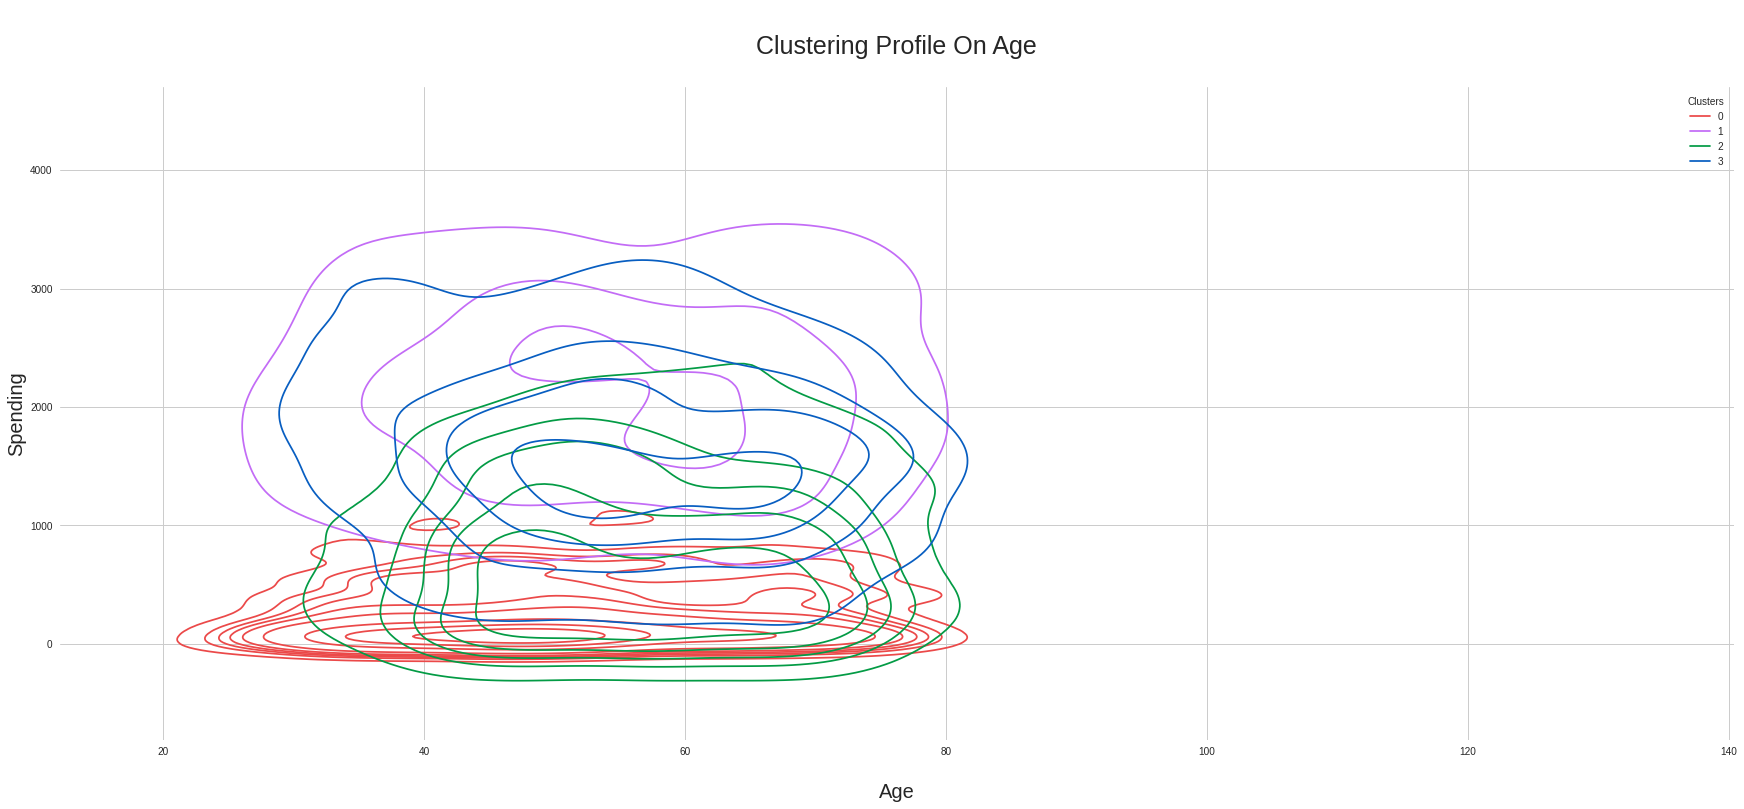

In [90]:
#cluster comparison of total item spending with their Age
density_cluster("Age")

**Insights:**

* Most of the customers of cluster 0 have age range in between 25 to 80. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 have age range in between 25 to 80. Their spending range is in between 800 to 3500.
* Most of the customers of cluster 2 have age range in between 25 to 75. Their spending range is in between 0 to 2500.
* Most of the customers of cluster 3 have age range in between 30 to 75. Their spending range is in between 200 to 3200.

#### total item spending X Marital Status

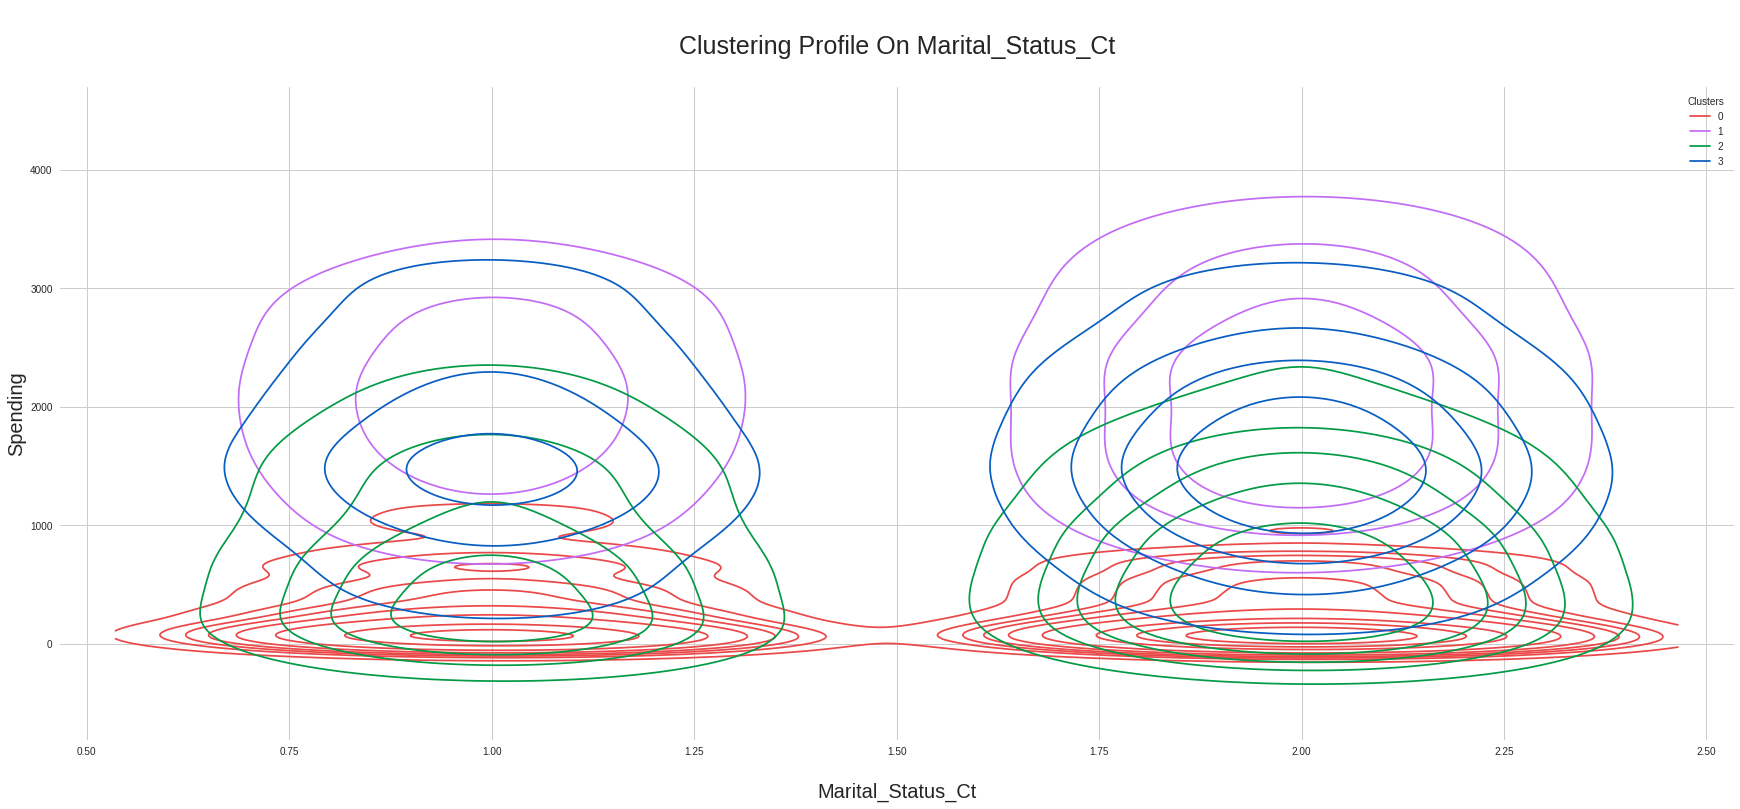

In [91]:
#cluster comparison of total item spending with their Marital Status
density_cluster("Marital_Status_Ct")

Insights:

* Single or Divorcee or Widowed: 1
* Married or Together: 2

* Some customers of cluster 0 are married and some are single. Their spending range is in between 0 to 1000.
* Most of the customers of cluster 1 are married. Their spending range is in between 800 to 3800.
* Most of the customers of cluster 2 are married. Their spending range is in between 0 to 3200.
* Some customers of cluster 3 are married and some are single. Their spending range is in between 500 to 3200.

#### total item spending X Parental Status

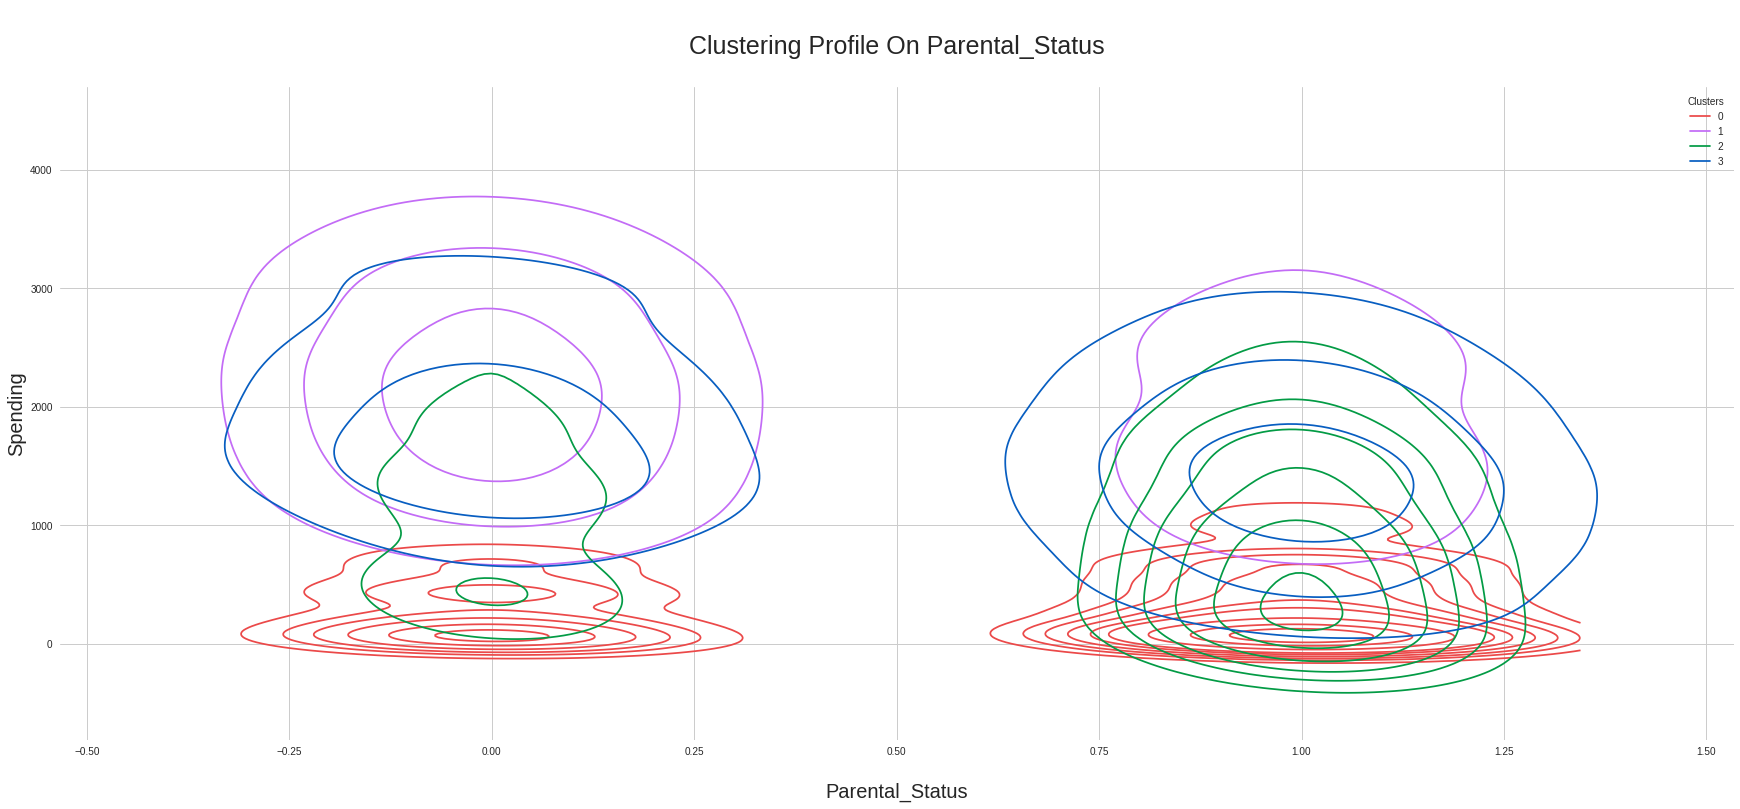

In [92]:
#cluster comparison of total item spending with their Parental Status i.e., they have kids in the household

#we will make a column to store their parental status
customer_data_treatment["Parental_Status"] = np.where(customer_data_treatment["Num_Kids"] > 0, 1, 0)

density_cluster("Parental_Status")

Insights:

* Parents: 1
* Not Parents: 0

* Most of the customers of cluster 0 are not parents and very few are parents. Their spending range is in between 0 to 800.
* Majority of the customers of cluster 1 are not parents. Their spending range is in between 800 to 3800.
* Majority of the customers of cluster 2 are parents. Their spending range is in between 0 to 2500.
* Majority of the customers of cluster 3 are parents. Their spending range is in between 0 to 3000.

#### total item spending X Customer Loyalty i.e. their days of joining

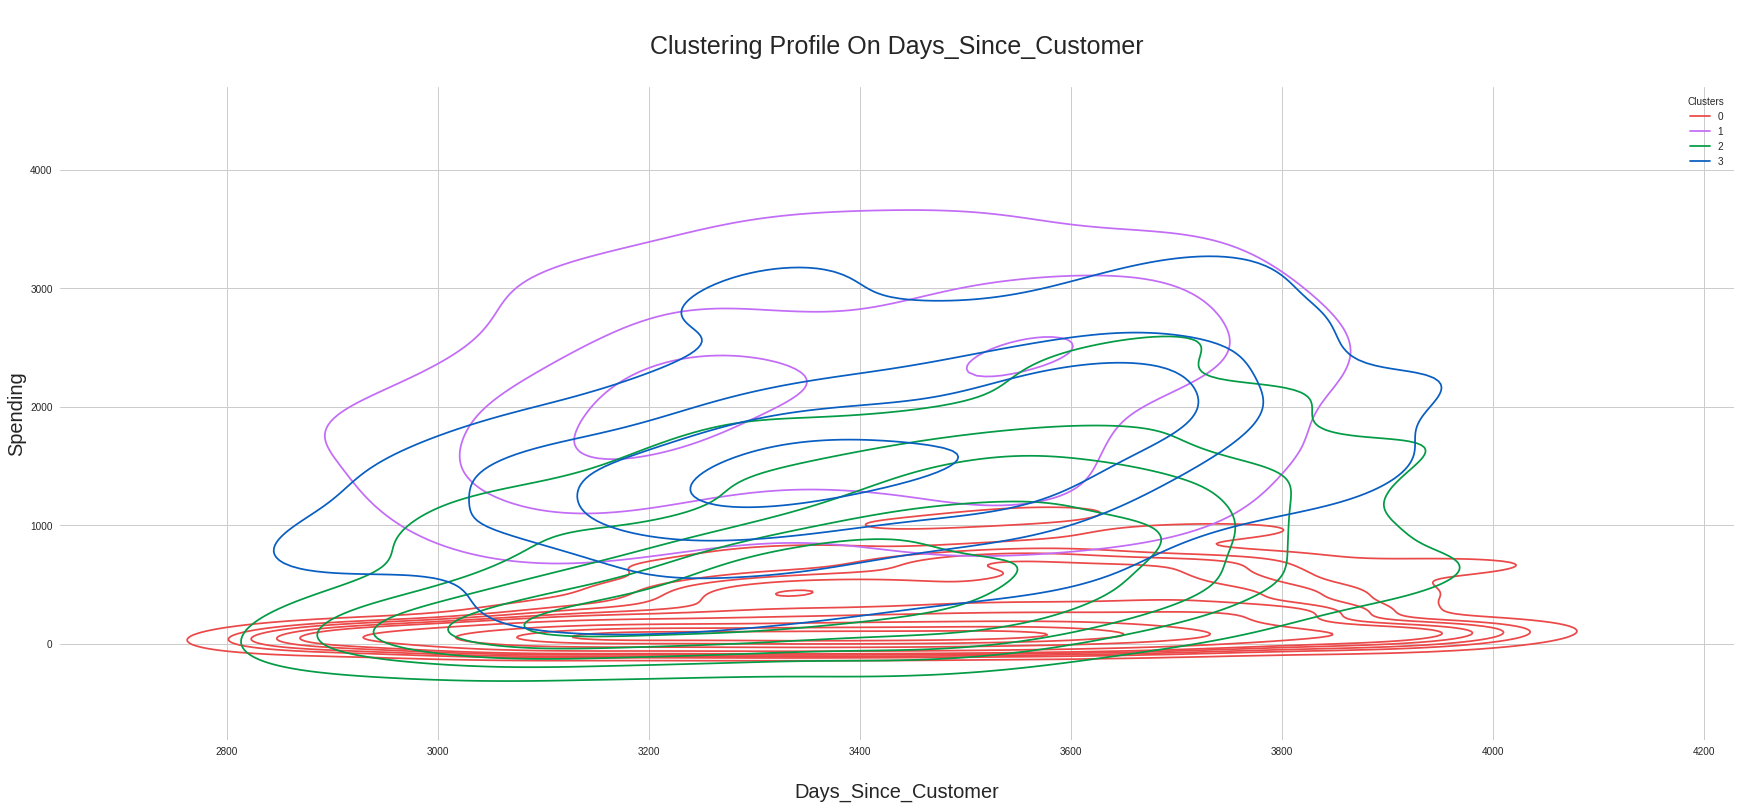

In [93]:
#cluster comparison of total item spending with their days of joining
density_cluster("Days_Since_Customer")

Insights:

* Most of the customers of cluster 0 are customer for 2800 to 4200 days. Their spending range is in between 0 to 1000.
* Most of the customers of cluster 1 are customer for 2900 to 3800 days. Their spending range is in between 800 to 3500.
* Most of the customers of cluster 2 are customer for 2800 to 3900 days. Their spending range is in between 0 to 2200.
* Most of the customers of cluster 3 are customer for 2900 to 3900 days. Their spending range is in between 0 to 3100.

# Cluster Profiles

## Cluster 0

* Income range is in between 1000 to 45000 and spending range is in between 0 to 1100
* Age range in between 25 to 80
* From any educational level
* Can be married and unmarried as well
* Most of them are not parents
* Some have at most child
* Customer for at least 2800 days

## Cluster 1

* Income range is in between 75000 to 155000 and spending range is in between 800 to 3200
* Age range in between 25 to 80
* Almost all have completed graduation
* Most of them are married
* They do not have any children
* Have at most one child, majority have no child.
* Customer for at least 2900 days

## Cluster 2

* Income range is in between 40000 to 60000 and spending range is in between 0 to 2600
* Age range in between 25 to 75
* Almost all have completed graduation
* Can be married and unmarried as well
* Majority of them are parents
* All have children, most have one or two children
* Customer for at least 2800 days

## Cluster 3

* Income range is in between 60000 to 75000 and spending range is in between 100 to 3100
* Age range in between 30 to 75
* Almost all have completed graduation
* Most of them are married
* Most of them are parents
* All have children, most have one child
* Customer for at least 2900 days


# Improvements

We can use PCA to further Kmeans clustering and which can also help us in handling any form of outliers that we are seeing within the clusters.